<a href="https://colab.research.google.com/github/NguyenNgocQuyen29/BaiTap_AI/blob/main/FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 20.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4864e812d3809353eab2cb8bfef1c8227fa6c703100d32615619da55e74825a5
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


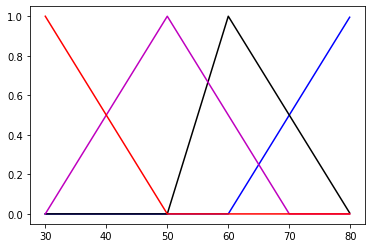

In [29]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt 

x = np.arange(30, 80, 0.1)
slow = fuzz.trimf(x, [30, 30, 50])
medium = fuzz.trimf(x, [30, 50, 70])
medium_fast = fuzz.trimf(x, [50, 60, 80])
full_speed = fuzz.trimf(x, [60, 80, 80])
plt.figure()
plt.plot(x, full_speed, 'b', linewidth = 1.5, label = 'Full Speed')
plt.plot(x, medium_fast, 'k', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, medium, 'm', linewidth = 1.5, label = 'Medium Powered')
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')

25.65481145163325


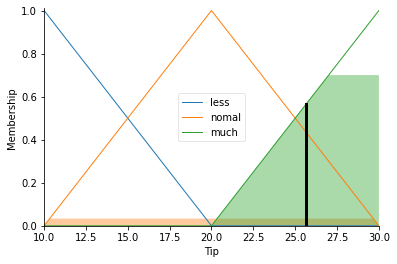

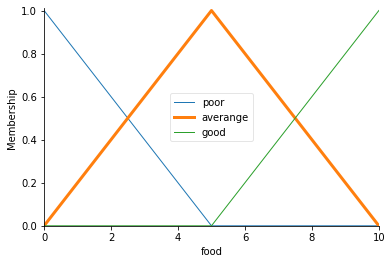

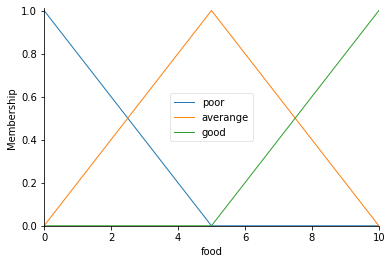

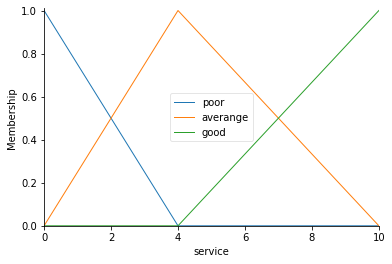

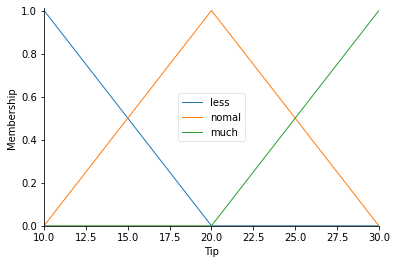

In [28]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food = ctrl.Antecedent( np.arange(0, 11, 1),'food')
service = ctrl.Antecedent( np.arange(0, 11, 1),'service')
tip = ctrl.Consequent( np.arange(10, 31, 1),'Tip')
food['poor'] = fuzz.trimf(food.universe,[0, 0, 5])
food['averange'] = fuzz.trimf(food.universe,[0, 5, 10])
food['good'] = fuzz.trimf(food.universe,[5, 10, 10])

service['poor'] = fuzz.trimf(service.universe,[0, 0, 4])
service['averange'] = fuzz.trimf(service.universe,[0, 4, 10])
service['good'] = fuzz.trimf(service.universe,[4, 10, 10])

tip['less'] = fuzz.trimf(tip.universe,[10, 10, 20])
tip['nomal'] = fuzz.trimf(tip.universe,[10, 20, 30])
tip['much'] = fuzz.trimf(tip.universe,[20, 30, 30])

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['averange'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['nomal'])
rule4 = ctrl.Rule(food['averange'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['averange'] & service['averange'], tip['nomal'])
rule6 = ctrl.Rule(food['averange'] & service['good'], tip['much'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['nomal'])
rule8 = ctrl.Rule(food['good'] & service['averange'], tip['nomal'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])
tipping_ctrl =ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim = tipping)


food['averange'].view()
food.view()
service.view()
tip.view()


65.6081081081081


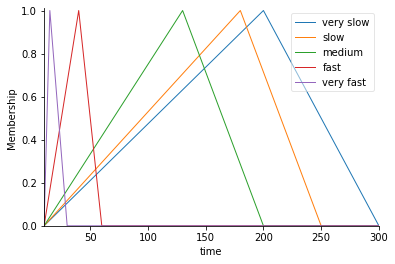

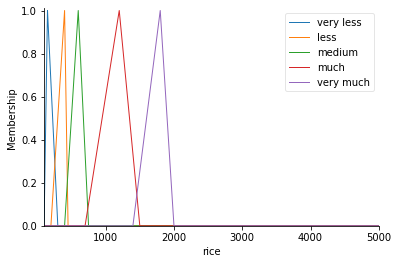

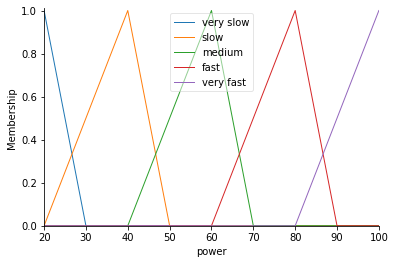

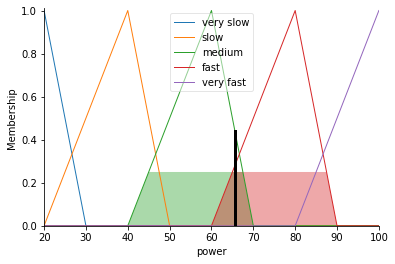

In [32]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(10,301,1),'time')
rice = ctrl.Antecedent(np.arange(100,5001,1),'rice')
power = ctrl.Consequent(np.arange(20,101,1),'power')

time['very slow'] = fuzz.trimf(time.universe, [10,200,300])
time['slow'] = fuzz.trimf(time.universe, [10,180,250])
time['medium'] = fuzz.trimf(time.universe, [10,130,200])
time['fast'] = fuzz.trimf(time.universe, [10,40,60])
time['very fast'] = fuzz.trimf(time.universe, [10,15,30])
time.view()

rice['very less'] = fuzz.trimf(rice.universe, [100,150,300])
rice['less'] = fuzz.trimf(rice.universe, [200,400,450])
rice['medium'] = fuzz.trimf(rice.universe, [400,600,750])
rice['much'] = fuzz.trimf(rice.universe, [700,1200,1500])
rice['very much'] = fuzz.trimf(rice.universe, [1400,1800,2000])
rice.view()

power['very slow'] = fuzz.trimf(power.universe, [0,20,30])
power['slow'] = fuzz.trimf(power.universe, [20,40,50])
power['medium'] = fuzz.trimf(power.universe, [40,60,70])
power['fast'] = fuzz.trimf(power.universe, [60,80,90])
power['very fast'] = fuzz.trimf(power.universe, [80,100,100])
power.view()

rule1 = ctrl.Rule(rice['very less']& time['very slow'], power['very slow'])
rule2 = ctrl.Rule(rice['very less']& time['slow'], power['slow'])
rule3 = ctrl.Rule(rice['very less']& time['medium'], power['medium'])
rule4 = ctrl.Rule(rice['very less']& time['fast'], power['fast'])
rule5 = ctrl.Rule(rice['very less']& time['very fast'], power['very fast'])
rule6 = ctrl.Rule(rice['less']& time['very slow'], power['very slow'])
rule7 = ctrl.Rule(rice['less']& time['slow'], power['slow'])
rule8 = ctrl.Rule(rice['less']& time['medium'], power['slow'])
rule9 = ctrl.Rule(rice['less']& time['fast'], power['medium'])
rule10 = ctrl.Rule(rice['less']& time['very fast'], power['medium'])
rule11 = ctrl.Rule(rice['medium']& time['very slow'], power['very slow'])
rule12 = ctrl.Rule(rice['medium']& time['slow'], power['medium'])
rule13 = ctrl.Rule(rice['medium']& time['medium'], power['medium'])
rule14 = ctrl.Rule(rice['medium']& time['fast'], power['medium'])
rule15 = ctrl.Rule(rice['medium']& time['very fast'], power['fast'])
rule16 = ctrl.Rule(rice['much']& time['very slow'], power['medium'])
rule17 = ctrl.Rule(rice['much']& time['slow'], power['medium'])
rule18 = ctrl.Rule(rice['much']& time['medium'], power['fast'])
rule19 = ctrl.Rule(rice['much']& time['fast'], power['fast'])
rule20 = ctrl.Rule(rice['much']& time['very fast'], power['very fast'])
rule21 = ctrl.Rule(rice['very much']& time['very slow'], power['medium'])
rule22 = ctrl.Rule(rice['very much']& time['slow'], power['medium'])
rule23 = ctrl.Rule(rice['very much']& time['medium'], power['fast'])
rule24 = ctrl.Rule(rice['very much']& time['fast'], power['very fast'])
rule25 = ctrl.Rule(rice['very much']& time['very fast'], power['very fast'])

power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
powering= ctrl.ControlSystemSimulation(power_ctrl)
powering.input['rice']=1500
powering.input['time']=150
powering.compute()
print(powering.output['power'])
power.view(sim=powering)